In [1]:
import csv
import json
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [2]:
# CONFIGURATION AND PATHS
ROOT = Path("/home/artur/Desktop/FA/data/NAKO_tabular/")

data_path_30k_metadata = ROOT / "30k_metadata/NAKO-536_2023-07-13_Erstuntersuchung_MRT_PSN_wie_194.csv"
data_path_13k_diabetes = ROOT / "13k_diabetes/NAKO_536_61223_export_baseln_MRT_PSN_wie_194.csv"
data_path_mri_data_part = ROOT / "MRI_Vol_CSA_FF/CSA_GluPso_real"

sns.set_theme()

In [3]:
data = pd.read_csv(data_path_30k_metadata, sep=";", encoding="latin1", on_bad_lines="warn")
grouped_data = data.groupby("basis_age", sort=False, as_index=False)
data.query(" 52 > basis_age > 40")

,ID,basis_age,basis_sex,basis_uort,basis_status_mrt,BD17,BD01,BD02,BD035,BD14,...,ws_lk_krepitation,ws_rk_krepitation,ws_lk_knauftr,ws_rk_knauftr,ws_lh_ruheschmerz,ws_lh_innenrotation,ws_lh_schmerzinrot,ws_rh_ruheschmerz,ws_rh_innenrotation,ws_rh_schmerzinrot
2,100002,47,1,81,3,29.1,146.0,87.0,45.0,1.0,...,2.0,1.0,2.0,2.0,2.0,25.0,2.0,2.0,20.0,2.0
8,100008,50,2,31,3,30.2,116.0,73.0,70.0,1.0,...,1.0,2.0,2.0,2.0,2.0,30.0,2.0,2.0,35.0,2.0
9,100009,49,2,81,3,26.6,130.0,88.0,59.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,100011,48,1,51,3,37.2,162.0,90.0,75.0,1.0,...,1.0,2.0,1.0,2.0,2.0,25.0,2.0,2.0,25.0,2.0
12,100012,46,2,51,3,26.9,119.0,73.0,61.0,1.0,...,2.0,2.0,2.0,2.0,1.0,35.0,2.0,2.0,30.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30920,131212,49,1,11,3,31.1,120.0,77.0,42.0,1.0,...,2.0,2.0,2.0,2.0,2.0,35.0,2.0,2.0,20.0,2.0
30921,131213,48,2,53,3,35.5,153.0,87.0,57.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30922,131214,47,1,81,3,29.0,102.0,66.0,73.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30925,131217,41,1,31,3,31.6,144.0,88.0,82.0,1.0,...,2.0,2.0,2.0,2.0,2.0,25.0,2.0,2.0,25.0,2.0


In [4]:
data.describe(include="all")

,ID,basis_age,basis_sex,basis_uort,basis_status_mrt,BD17,BD01,BD02,BD035,BD14,...,ws_lk_krepitation,ws_rk_krepitation,ws_lk_knauftr,ws_rk_knauftr,ws_lh_ruheschmerz,ws_lh_innenrotation,ws_lh_schmerzinrot,ws_rh_ruheschmerz,ws_rh_innenrotation,ws_rh_schmerzinrot
count,30927.000000,30927.000000,30927.000000,30927.000000,30927.0,30916.000000,30911.000000,30911.000000,30911.00000,30900.000000,...,13063.000000,13054.000000,13062.000000,13053.000000,13103.000000,13045.000000,13046.000000,13102.000000,13040.000000,13042.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,115702.525884,48.335985,1.440263,58.887897,3.0,30.487938,130.832487,80.616965,69.18563,2.009223,...,1.724642,1.708518,1.972822,1.970581,1.964359,30.985895,1.977311,1.962677,29.751457,1.976537
std,8997.411857,12.286111,0.496427,124.639126,0.0,4.357178,52.685041,51.126066,51.56351,98.510949,...,0.446712,0.454462,0.162608,0.168983,0.185400,88.267431,0.148916,0.189558,13.143160,0.151373
min,100000.000000,19.000000,1.000000,11.000000,3.0,16.000000,83.000000,46.000000,25.00000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-35.000000,1.000000,1.000000,-35.000000,1.000000
25%,107936.500000,41.000000,1.000000,21.000000,3.0,28.000000,119.000000,73.000000,62.00000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,20.000000,2.000000,2.000000,20.000000,2.000000
50%,115755.000000,49.000000,1.000000,31.000000,3.0,30.300000,129.000000,80.000000,68.00000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,30.000000,2.000000
75%,123486.500000,58.000000,2.000000,53.000000,3.0,32.700000,140.000000,87.000000,75.00000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,40.000000,2.000000,2.000000,40.000000,2.000000


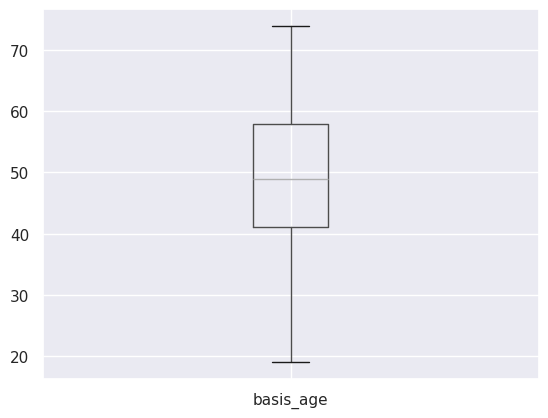

In [5]:
data.boxplot(column="basis_age")
plt.show()

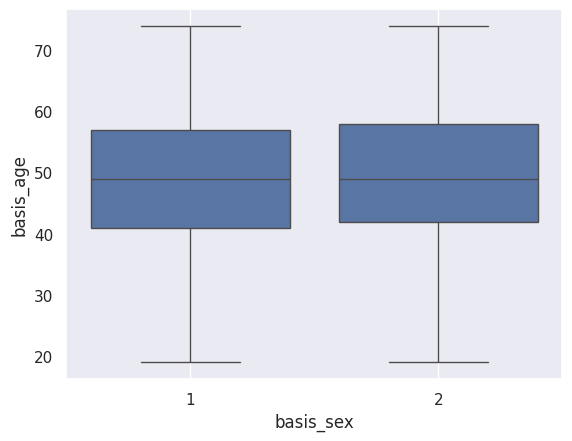

In [6]:
sns.boxplot(data, x="basis_sex", y="basis_age")
plt.grid()
plt.show()

In [11]:
grouped_data = data.groupby("basis_sex", as_index=False)

In [12]:
fig = px.box(grouped_data, y="basis_age")
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of [0, 1] but received: basis_age